In [ ]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
folder_path = "shoes\\train"
os.listdir(folder_path)

['adidas', 'converse', 'nike']

In [ ]:
def get_label(folder_path):
    labels = os.listdir(folder_path)
    labels_img_dict = dict.fromkeys(labels)
    for labels in labels_img_dict.keys():
        imgs = os.listdir(os.path.join(folder_path,labels))
        images_path = []
        for img in imgs:
            img_path = os.path.join(folder_path,labels,img)
            images_path.append(img_path)
        labels_img_dict[labels]=images_path
    return labels_img_dict

In [5]:
img_dict = get_label(folder_path)

In [6]:
img_df = pd.DataFrame(img_dict)
img_df.head()

,adidas,converse,nike
0,shoes\train\adidas\100.jpg,shoes\train\converse\100.jpg,shoes\train\nike\100.jpg
1,shoes\train\adidas\101.jpg,shoes\train\converse\101.jpg,shoes\train\nike\101.jpg
2,shoes\train\adidas\102.jpg,shoes\train\converse\102.jpg,shoes\train\nike\102.jpg
3,shoes\train\adidas\103.jpg,shoes\train\converse\103.jpg,shoes\train\nike\103.jpg
4,shoes\train\adidas\104.jpg,shoes\train\converse\104.jpg,shoes\train\nike\104.jpg


In [6]:
img_df.to_csv('images_path_df.csv',index=False)

In [7]:
import numpy as np

In [8]:
# Process the image
def image_process(img):
    img_pil = Image.open(img)
    img_ary = np.array(img_pil)
    img_flat = img_ary.flatten()
    df_t = pd.DataFrame(img_flat).T
    return df_t

In [7]:
cols = img_df.columns

In [8]:
cols

Index(['adidas', 'converse', 'nike'], dtype='object')

In [9]:
df_k = pd.DataFrame()

In [11]:
for label in cols:
    images = img_df[label]
    for image in images:
        df_x=image_process(image)
        df_x['shoes'] = label
        df_k = pd.concat([df_k,df_x])

In [12]:
df_k.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
0,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [13]:
df_k.to_csv('image_array_kathford.csv',index=False)

In [14]:
data=df_k.copy()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
0,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [8]:
data = pd.read_csv('image_array_kathford.csv')

In [15]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
0,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [16]:
X= data.drop('shoes',axis=1)
y=data['shoes']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [18]:
model_dict = {
    'lr_model' : LogisticRegression(max_iter=10000),
    'svc_model' : SVC(),
    'rf_model': RandomForestClassifier(),
    'dt_model': DecisionTreeClassifier(),
    'knn_model': KNeighborsClassifier()
}

In [19]:
# get train and test data
X= data.drop('shoes',axis=1)
y=data.shoes

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
acc_s =list()

In [24]:
for name,model in model_dict.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc =accuracy_score(y_test,y_pred)
    acc_s.append(acc)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc_s = []
conf_matrices = {}   

for name, model in model_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_s.append(acc)
    
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm 

    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)



Model: lr_model
Accuracy: 0.3986013986013986
Confusion Matrix:
 [[22 16 19]
 [17 16 11]
 [ 9 14 19]]

Model: svc_model
Accuracy: 0.5034965034965035
Confusion Matrix:
 [[14 22 21]
 [ 9 22 13]
 [ 3  3 36]]

Model: rf_model
Accuracy: 0.44755244755244755
Confusion Matrix:
 [[14 24 19]
 [ 5 27 12]
 [11  8 23]]

Model: dt_model
Accuracy: 0.3706293706293706
Confusion Matrix:
 [[23 20 14]
 [14 15 15]
 [17 10 15]]

Model: knn_model
Accuracy: 0.4405594405594406
Confusion Matrix:
 [[35 15  7]
 [24 19  1]
 [20 13  9]]


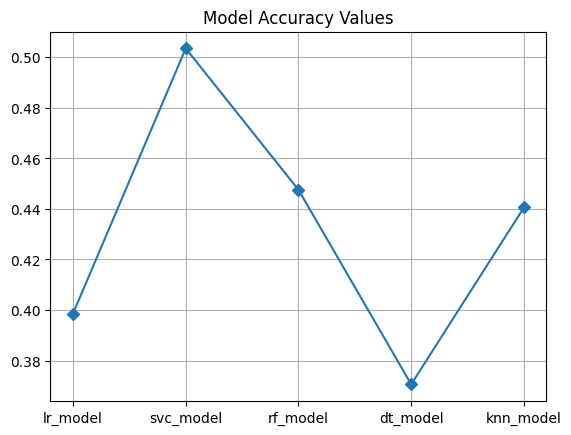

In [28]:
plt.title("Model Accuracy Values")
plt.plot(model_dict.keys(),acc_s,marker='D')
plt.grid()

In [29]:
svc_m = SVC()
svc_m.fit(X_train,y_train)

SVC()

In [89]:
import joblib
joblib.dump(svc_m,'svc.pt')

['svc.pt']